In [10]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2022-02-02T14:18:13.829736-03:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 11, GenuineIntel
CPU cores   : 4
Architecture: 64bit



In [11]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
matplotlib.rcParams['figure.figsize'] = [14,14]
np.random.seed(40)

In [13]:
vehiculos = pd.read_csv('vehiculos_procesado_con_grupos.csv')
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [14]:
vehiculos = vehiculos.drop(
    ["fabricante","modelo","transmision","traccion","clase",
     "combustible","consumo_tipo"],axis = 1)

In [15]:
vehiculos.shape

(36791, 12)

In [16]:
datos_numericos = vehiculos.select_dtypes(["int64","float64"]) #*****
datos_numericos

,year,desplazamiento,cilindros,consumo,co2,consumo_litros_milla
0,1984,2.5,4.0,17,522.764706,0.222671
1,1984,4.2,6.0,13,683.615385,0.291185
2,1985,2.5,4.0,16,555.437500,0.236588
3,1985,4.2,6.0,13,683.615385,0.291185
4,1987,3.8,6.0,16,555.437500,0.236588
...,...,...,...,...,...,...
36786,2015,1.0,3.0,36,244.000000,0.105150
36787,2016,0.9,3.0,35,246.000000,0.108155
36788,2016,0.9,3.0,34,255.000000,0.111336
36789,2017,0.9,3.0,35,248.000000,0.108155


In [17]:
datos_categoricos = vehiculos.select_dtypes([object])
datos_categoricos

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto
...,...,...,...,...,...,...
36786,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo
36787,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo
36788,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo
36789,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo


In [18]:
print(datos_numericos.isnull().sum())
print(datos_categoricos.isnull().sum())

year                    0
desplazamiento          2
cilindros               3
consumo                 0
co2                     0
consumo_litros_milla    0
dtype: int64
clase_tipo           0
traccion_tipo        0
transmision_tipo     0
combustible_tipo     0
tamano_motor_tipo    2
co2_tipo             0
dtype: int64


In [19]:
# imputar
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(),inplace=True)

C:\Users\Gamer\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
print(datos_numericos.isnull().sum())

year                    0
desplazamiento          0
cilindros               0
consumo                 0
co2                     0
consumo_litros_milla    0
dtype: int64


In [21]:
# normalizar los datos numericos
from sklearn.preprocessing import MinMaxScaler

datos_numericos_normalizados = MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizados = pd.DataFrame(datos_numericos_normalizados,
                                           columns=datos_numericos.columns)

In [22]:
datos_numericos_normalizados

,year,desplazamiento,cilindros,consumo,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.196078,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.117647,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.176471,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.117647,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.176471,0.424351,0.360294
...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.568627,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.549020,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.529412,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.549020,0.176532,0.090196


In [23]:
# codificar las variables categoricas
datos_categoricos_codificados = pd.get_dummies(datos_categoricos)
datos_categoricos_codificados

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,tamano_motor_tipo_grande,tamano_motor_tipo_mediano,tamano_motor_tipo_muy grande,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [24]:
vehiculos_procesados = pd.concat([datos_numericos_normalizados,
                                  datos_categoricos_codificados], axis = 1)
vehiculos_procesados.shape

(36791, 32)

In [25]:
# sacar un vehiculo para prueba posterior
vehiculo_test = vehiculos_procesados[-1:]
vehiculo_test

,year,desplazamiento,cilindros,consumo,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,...,tamano_motor_tipo_grande,tamano_motor_tipo_mediano,tamano_motor_tipo_muy grande,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
36790,0.970588,0.038462,0.071429,0.529412,0.183786,0.096886,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
# reducir los dataset
vehiculos_procesados = vehiculos_procesados[:-1]
vehiculos = vehiculos[:-1]

print(vehiculos_procesados.shape)
print(vehiculos.shape)

(36790, 32)
(36790, 12)


In [27]:
from sklearn.cluster import KMeans

In [28]:
estimador_kmedias = KMeans(n_clusters=8,random_state=40)
estimador_kmedias.fit(vehiculos_procesados)

KMeans(random_state=40)

In [29]:
lclusters = estimador_kmedias.labels_
lclusters

array([3, 3, 3, ..., 1, 5, 1])

In [30]:
# prediccion
estimador_kmedias.predict(vehiculo_test)

array([5])

In [31]:
centroides = estimador_kmedias.cluster_centers_
centroides

array([[ 5.81449189e-01,  3.97000755e-01,  3.30087948e-01,
         2.30501011e-01,  3.70181010e-01,  3.00085605e-01,
         2.88860805e-03,  3.61076006e-02,  6.53547572e-02,
         1.57970753e-01,  7.01390143e-01,  2.85250045e-02,
         3.06914606e-03,  4.69398808e-03,  2.66453526e-15,
         1.00000000e+00,  7.06625745e-01,  2.93374255e-01,
         3.61076006e-04,  1.25455202e-14,  9.74905218e-03,
         9.89889872e-01,  2.47698140e-01,  3.62339773e-01,
         1.98050190e-01,  5.28976350e-02,  1.39014263e-01,
         1.35042426e-01,  2.29283264e-01,  4.71023650e-01,
         1.36486730e-01,  2.81639285e-02],
       [ 5.65782236e-01,  1.55184954e-01,  1.41343071e-01,
         3.91680113e-01,  2.48032780e-01,  1.66053715e-01,
         1.24900090e-15,  1.01932668e-01,  1.71446384e-02,
         9.91271820e-02,  7.49064838e-01,  2.71197007e-02,
         6.23441397e-04,  4.98753117e-03,  3.52244389e-02,
         9.64775561e-01,  1.00000000e+00, -6.10622664e-16,
         1.80

In [32]:
# distancia entre los centroides <=> distancia entre los cluster
from sklearn.metrics import euclidean_distances

distancias_centroides = euclidean_distances(centroides)
print(distancias_centroides.shape)
distancias_centroides

(8, 8)


array([[0.        , 1.89838483, 2.0119631 , 1.58806487, 2.19362544,
        2.03341066, 1.50601199, 1.7499651 ],
       [1.89838483, 0.        , 2.21845952, 1.76967447, 2.17813569,
        1.43479019, 2.27047028, 1.61325104],
       [2.0119631 , 2.21845952, 0.        , 1.67404008, 1.76591391,
        2.40143873, 2.06638071, 1.94861312],
       [1.58806487, 1.76967447, 1.67404008, 0.        , 1.54675783,
        1.95253546, 2.06075705, 1.35222057],
       [2.19362544, 2.17813569, 1.76591391, 1.54675783, 0.        ,
        2.24977742, 1.49859953, 1.76746433],
       [2.03341066, 1.43479019, 2.40143873, 1.95253546, 2.24977742,
        0.        , 2.48213998, 1.77416814],
       [1.50601199, 2.27047028, 2.06638071, 2.06075705, 1.49859953,
        2.48213998, 0.        , 2.168641  ],
       [1.7499651 , 1.61325104, 1.94861312, 1.35222057, 1.76746433,
        1.77416814, 2.168641  , 0.        ]])

In [33]:
list(zip(np.argmax(distancias_centroides,axis=1),np.max(distancias_centroides,axis=1)))

[(4, 2.1936254386858103),
 (6, 2.270470277553476),
 (5, 2.4014387315175676),
 (6, 2.060757045316059),
 (5, 2.2497774159754313),
 (6, 2.482139978087255),
 (5, 2.482139978087255),
 (6, 2.1686409998445235)]

In [35]:
# mostrar un resumen de los valores de las variables de cada cluster
def r_cluster(cluster_id):
    cluster = vehiculos[lclusters == cluster_id]
    # a los valores catgoricos asignamos la moda
    resumen_cluster = cluster[datos_categoricos.columns].mode().to_dict(orient="records")[0]
    # a los valores numericos asignamos la media
    resumen_cluster.update(cluster.mean().to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

In [36]:
r_cluster(4)

C:\Users\Gamer\AppData\Local\Temp/ipykernel_888/3971726905.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())


{'clase_tipo': 'Deportivos',
 'traccion_tipo': 'cuatro',
 'transmision_tipo': 'Automatica',
 'combustible_tipo': 'Normal',
 'tamano_motor_tipo': 'grande',
 'co2_tipo': 'alto',
 'year': 2001.583795782464,
 'desplazamiento': 3.2610124333925503,
 'cilindros': 5.465142095914742,
 'consumo': 18.221309655937848,
 'co2': 501.006272728902,
 'consumo_litros_milla': 0.21331672395658105,
 'cluster_id': 4}

In [37]:
def comparar_clusters(*cluster_ids):
    resumenes = []
    for clus_id in cluster_ids:
        resumenes.append(r_cluster(clus_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [38]:
comparar_clusters(*np.unique(lclusters))

C:\Users\Gamer\AppData\Local\Temp/ipykernel_888/3971726905.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())


cluster_id,0,1,2,3,4,5,6,7
clase_tipo,Coches pequeños,Coches pequeños,Camionetas,Camionetas,Deportivos,Coches pequeños,Coches pequeños,Coches Medianos
traccion_tipo,dos,dos,dos,dos,cuatro,dos,cuatro,dos
transmision_tipo,Automatica,Automatica,Automatica,Automatica,Automatica,Manual,Automatica,Automatica
combustible_tipo,Premium,Normal,Normal,Normal,Normal,Normal,Premium,Normal
tamano_motor_tipo,mediano,muy pequeño,muy grande,grande,grande,muy pequeño,mediano,pequeño
co2_tipo,moderado,muy bajo,muy alto,moderado,alto,muy bajo,moderado,bajo
year,2003.769272,2003.24267,1997.099534,1996.735841,2001.583796,1997.644568,2009.474777,2001.315075
desplazamiento,3.696606,1.810449,5.506487,3.458001,3.261012,1.896917,3.534421,2.598199
cilindros,6.621231,3.97879,8.068924,5.866647,5.465142,4.05102,6.389614,4.589193
consumo,18.755552,26.97879,14.102169,18.114174,18.22131,26.221729,18.967359,22.482605


In [39]:
# es mas rapida que KMeans
from sklearn.cluster import MiniBatchKMeans

In [ ]:
##

In [40]:
%%timeit -n 1
estimador_kmedias = KMeans(n_clusters=8,random_state=40).fit(vehiculos_procesados)

1.22 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit -n 1
estimador_kmedias_minibatch = MiniBatchKMeans(n_clusters=8,random_state=40).fit(vehiculos_procesados)

C:\Users\Gamer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Gamer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Gamer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\G

298 ms ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
# una forma de eleccion de hiperparametro k
# el metodo del codo (elbow method) => ver la estabilizacion de la inercia
# ademas se puede agregar a este analisis el comportamiento de la varianza

In [42]:
from scipy.spatial.distance import cdist


In [45]:
vehiculos_procesados.mean()

year                                           0.493735
desplazamiento                                 0.348955
cilindros                                      0.267612
consumo                                        0.255131
co2                                            0.358053
consumo_litros_milla                           0.285739
clase_tipo_Camionetas                          0.147839
clase_tipo_Coche Familiar                      0.068850
clase_tipo_Coches Grandes                      0.049932
clase_tipo_Coches Medianos                     0.115820
clase_tipo_Coches pequeños                     0.353520
clase_tipo_Deportivos                          0.143762
clase_tipo_Furgoneta                           0.060098
clase_tipo_Vehículos Especiales                0.060179
traccion_tipo_cuatro                           0.269720
traccion_tipo_dos                              0.730280
transmision_tipo_Automatica                    0.677820
transmision_tipo_Manual                        0

In [46]:
varianza_total = cdist(XA=vehiculos_procesados, XB=np.array([vehiculos_procesados.mean()]))

In [47]:
varianza_total

array([[1.92297556],
       [1.90051168],
       [1.91798413],
       ...,
       [1.96272567],
       [2.13242952],
       [1.96948961]])

In [48]:
suma_varianza_total = varianza_total.sum()
suma_varianza_total

72200.16471907133

In [49]:
# calcula la varianza intra cluster
def varianza_cluster(cluster_id, centroid_cluster,etiquetas_cluster):
    elementos_cluster = vehiculos_procesados[etiquetas_cluster==cluster_id]
    return cdist(XA=elementos_cluster,XB=np.array([centroid_cluster])).sum()

In [50]:
# función evalua la varianza de k-means
def medida_varianza(estimador_kmedias, suma_varianza_total):
    etiquetas_cluster = estimador_kmedias.labels_
    acum = 0
    for i, cluster_id in enumerate(np.unique(etiquetas_cluster)):
        centroide_cluster = estimador_kmedias.cluster_centers_[i]
        acum += varianza_cluster(cluster_id, centroide_cluster,etiquetas_cluster)
        # retorna la varianza explicada
        return (suma_varianza_total - acum) / suma_varianza_total

In [51]:
def medida_inercia(estimador_kmeans):
    return estimador_kmeans.inertia_

In [56]:
def evaluar_k_kmedias(k, medida, **kwargs):
    if medida == "inercia":
        f_medida = medida_inercia
    elif medida == "varianza":
        f_medida = medida_varianza
    estimadorKMeans = KMeans(random_state= 40, n_clusters = k)
    estimadorKMeans.fit(vehiculos_procesados)
    return f_medida(estimadorKMeans,**kwargs)
    

In [57]:
resultados = {}
valores_k = [2,8,20,40,50,100,200,300]

for k in valores_k:
    resultados [k] = evaluar_k_kmedias(k,"inercia")
    #evaluar_k_kmedias(k,"varianza",
    #                                                             suma_varianza_total = 
    #                                                            suma_varianza_total)

In [58]:
resultados

{2: 125699.21313423905,
 8: 85442.137628459,
 20: 63318.37713377259,
 40: 47792.33313553202,
 50: 42933.07423353719,
 100: 28395.720937708353,
 200: 16078.856143108684,
 300: 9671.104629308862}

Text(0.5, 1.0, 'Inercia ... metodo del codo')

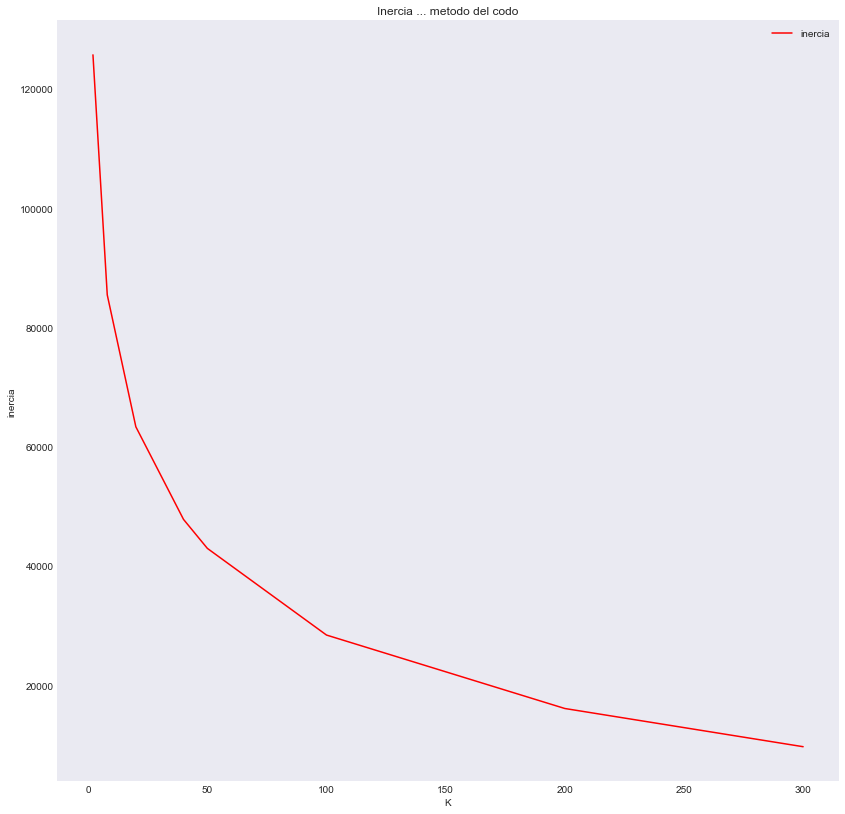

In [60]:
plt.style.use("seaborn-dark")
fig, ax1 = plt.subplots()
ax1.plot(
    [c[0] for c in resultados.items()],
    [c[1] for c in resultados.items()], label = "inercia", color ="red" 
)
ax1.set_ylabel('inercia')
plt.xlabel("K")
plt.legend()
plt.title("Inercia ... metodo del codo")